### Codio Activity 6.3: Plotting and Interpreting Singular Values

**Expected Time: 60 Minutes**

**Total Points: 20 Points**

This activity focuses on building a scree plot with Python.  A scree plot can be used to determine how many Principal Components to keep in a given dataset.  Using an `sklearn` built in housing dataset, you will plot the values of $\Sigma$ in decreasing order -- this is a scree plot.  For more on scree plots see [here](https://en.wikipedia.org/wiki/Scree_plot#:~:text=In%20multivariate%20statistics%2C%20a%20scree,principal%20component%20analysis%20(PCA).).

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
import seaborn as sns
from scipy.linalg import svd
from sklearn.datasets import make_regression

In [3]:
housing = fetch_california_housing(as_frame = True, data_home='data')

In [4]:
df = housing.frame.head(50).drop('MedHouseVal', axis = 1) #limits due to computation 

In [5]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
df.shape

(50, 8)

[Back to top](#Index:) 

## Problem 1

### Extracting $\Sigma$

**10 Points**

Complete the function `singular_values` according to the instructions below:

- The function takes, as input, an aray `X`, and a booloean flag `scale`, describing whether you want to scale the array `X` or not.
- Using an `if` statement, check if `scale` is `True`. If it is, scale `X` using its mean and standard deviation.
- If `scale` is not `True`, use the `svd` function to factor `X` into  `u`, `sigma`, and `vt`.
- The function should return the numpy array of singular values of X, `sigma`.


In [7]:
### GRADED

def singular_values(X, scale=False):
    """Return the singular values resulting from 
    SVD decomposition as a DataFrame.  
    Parameters
    ----------
    X: np.array or pd.DataFrame
        An array of data
    scale: boolean
        Boolean determines whether data needs to be scaled
    Returns a DataFrame of singular values of X
    """
    
    if scale:
        X = (X - X.mean())/X.std()
        
    u, sigma, vt = svd(X)
    return sigma

# Example usage:
print(singular_values(df))
# Answer check
print(type(singular_values(df)))
sigma = singular_values(df)
print(sigma.shape)

[6.60167785e+03 4.02993766e+02 3.56009932e+01 1.19618311e+01
 4.11982067e+00 1.36597020e+00 3.87851125e-01 5.13333826e-02]
<class 'numpy.ndarray'>
(8,)


[Back to top](#Index:) 

## Problem 2

### Plotting $\Sigma$

**10 Points**

Using the function above, build a plot of the singular values. Use your plot to determine how many principal components you should keep from the dataframe `df`.  Assign your solution as an integer to `ans2` below.



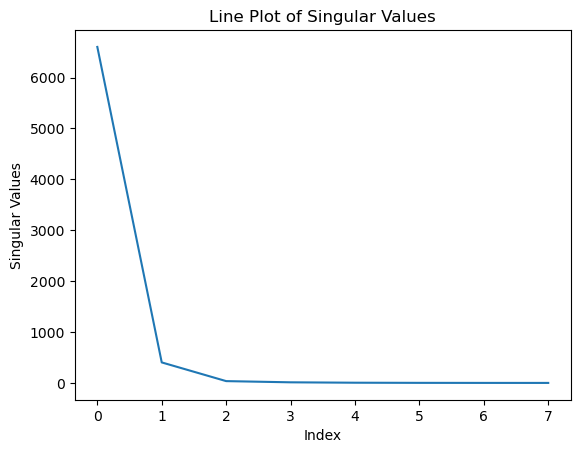

In [8]:
### GRADED

#plot of singular values here
plt.plot(singular_values(df))
plt.xlabel('Index')
plt.ylabel('Singular Values')
plt.title('Line Plot of Singular Values')
plt.show()
#how many components should you keep?
ans2 = 1

Depending on the dataset, we may have a different number of principal components to keep.  While not a hard fast statistical test, using a scree plot can provide some information on the appropriate number of values to keep.  